# Regression Training and Testing

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


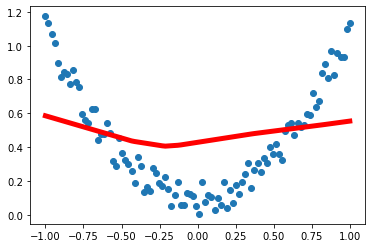

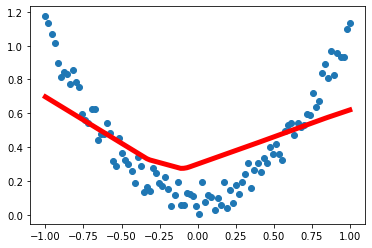

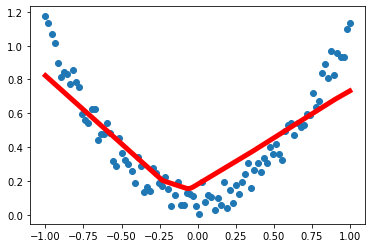

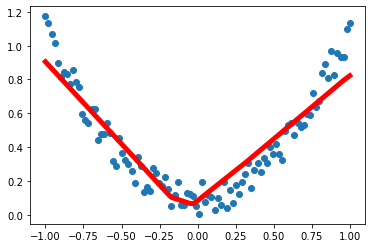

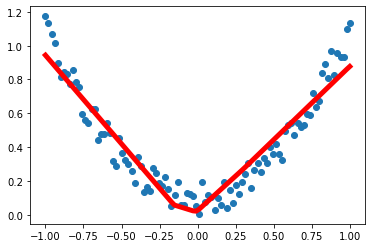

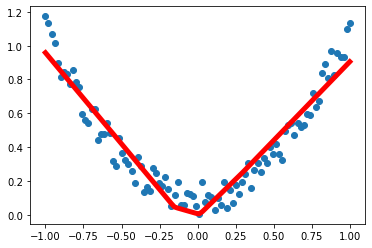

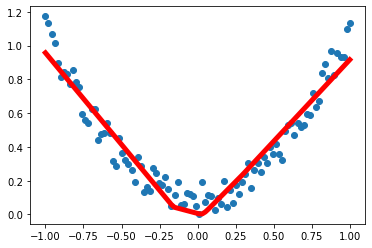

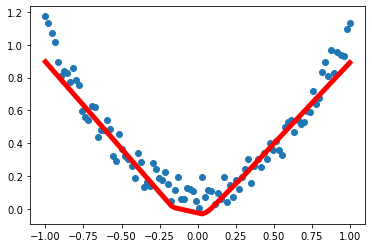

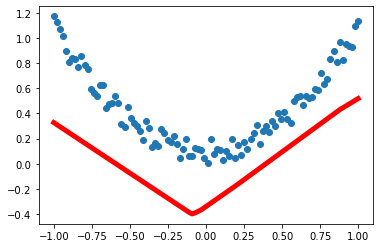

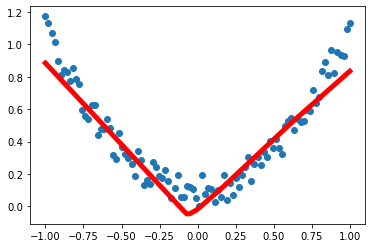

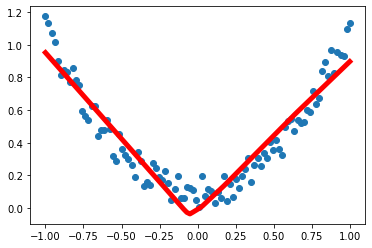

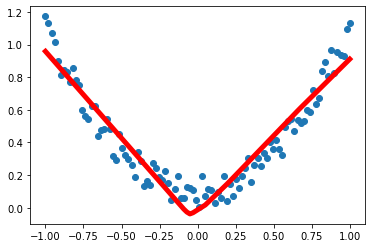

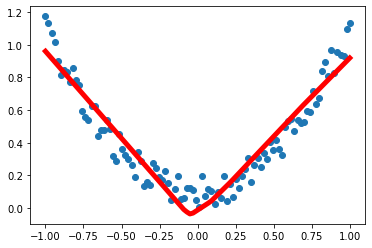

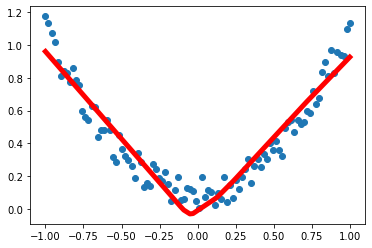

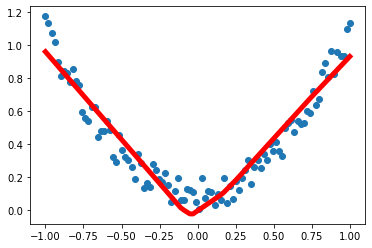

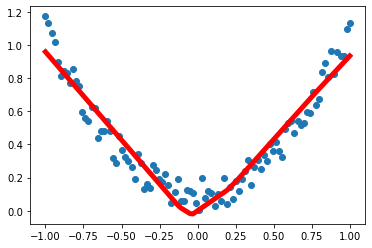

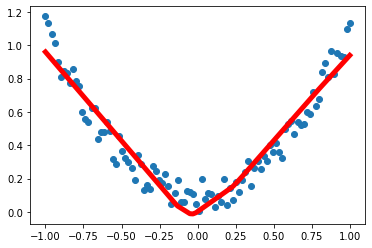

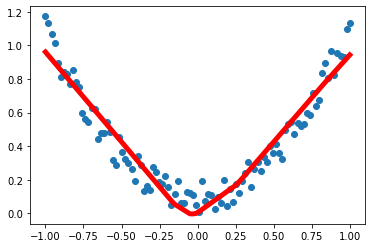

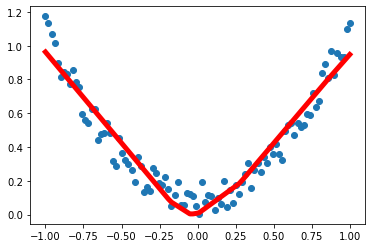

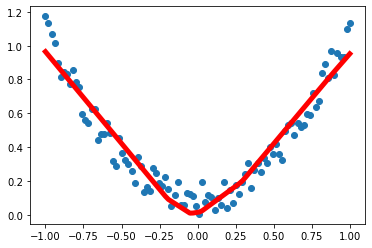

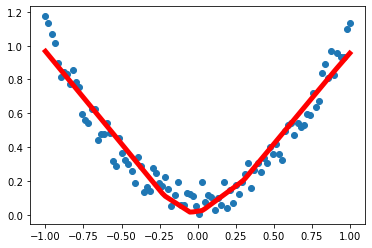

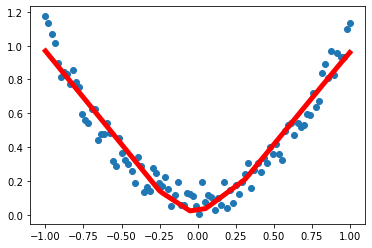

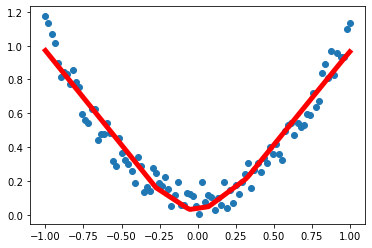

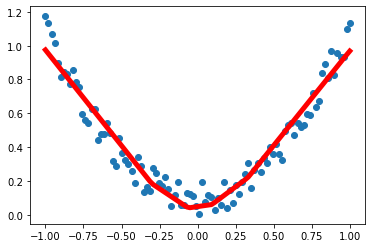

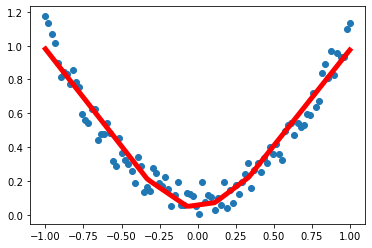

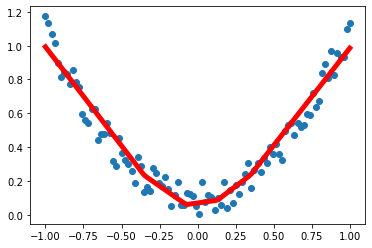

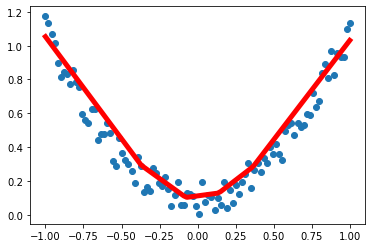

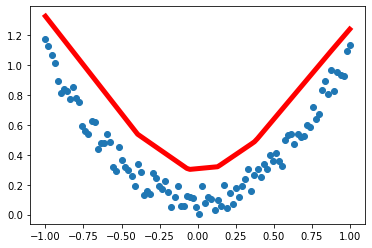

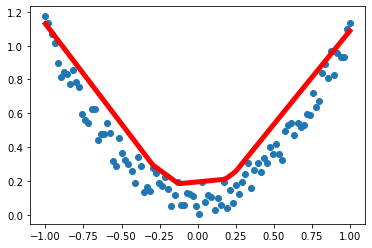

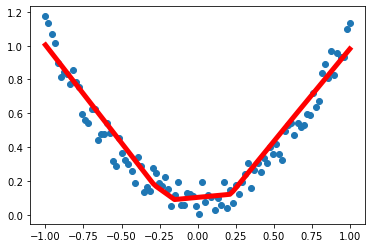

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # 将1维的数据转换为2维数据
y = x.pow(2) + 0.2 * torch.rand(x.size())
# 将tensor置入Variable中
x, y = Variable(x), Variable(y)
#plt.scatter(x.data.numpy(), y.data.numpy())
#plt.show()

# 定义一个构建神经网络的类
class Net(torch.nn.Module): # 继承torch.nn.Module类
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() # 获得Net类的超类（父类）的构造方法
        # 定义神经网络的每层结构形式
        # 各个层的信息都是Net类对象的属性
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output) # 输出层线性输出
    # 将各层的神经元搭建成完整的神经网络的前向通路
    def forward(self, x):
        x = F.relu(self.hidden(x)) # 对隐藏层的输出进行relu激活
        x = self.predict(x)
        return x

# 定义神经网络
net = Net(1, 10, 1)
print(net) # 打印输出net的结构

# 定义优化器和损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # 传入网络参数和学习率
loss_function = torch.nn.MSELoss() # 最小均方误差

# 神经网络训练过程
plt.ion()  # 动态学习过程展示
plt.show()

for t in range(300):
    prediction = net(x) # 把数据x喂给net，输出预测值
    loss = loss_function(prediction, y) # 计算两者的误差，要注意两个参数的顺序
    optimizer.zero_grad() # 清空上一步的更新参数值
    loss.backward() # 误差反相传播，计算新的更新参数值
    optimizer.step() # 将计算得到的更新值赋给net.parameters()

    # 可视化训练过程
    if (t+1) % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        #plt.text(0.5, 0, 'L=%.4f' % loss.data[0], fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

# Classfication Training and Testing

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


C:\Users\ps\AppData\Local\Temp/ipykernel_23960/1263238536.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = torch.max(F.softmax(out), 1)[1] # 在第1维度取最大值并返回索引值


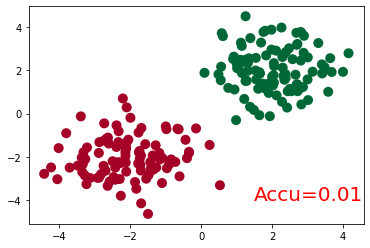

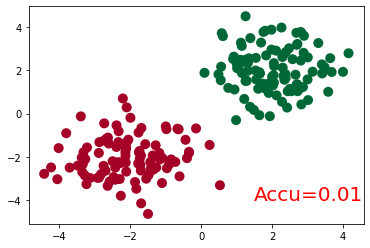

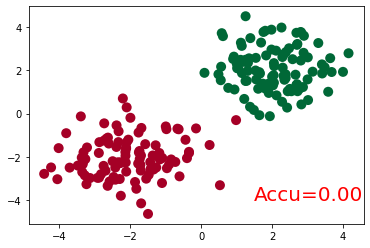

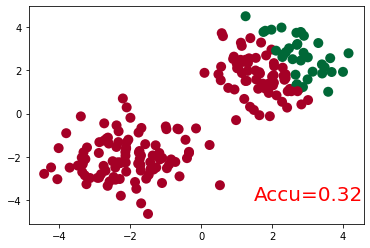

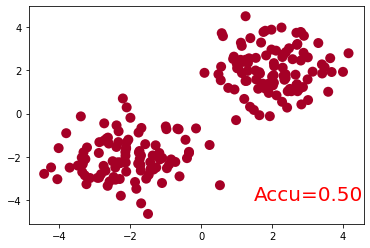

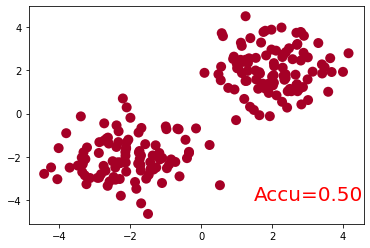

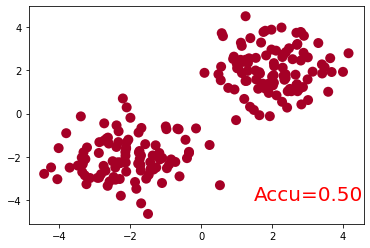

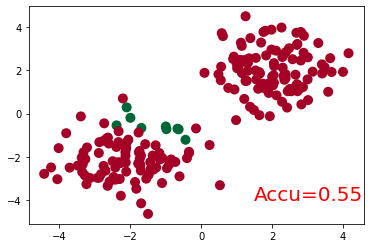

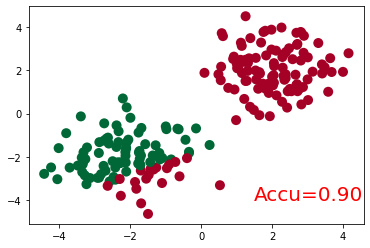

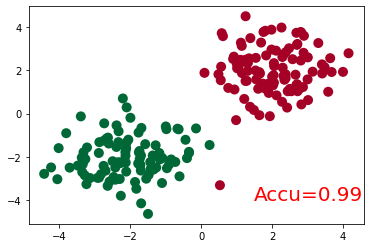

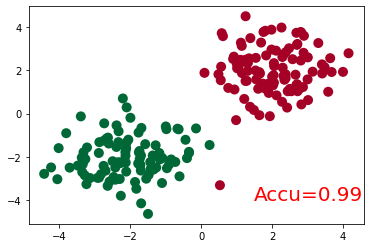

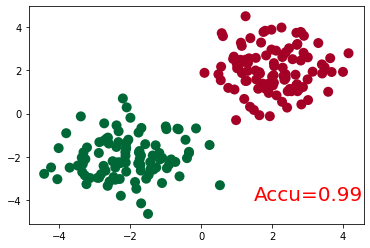

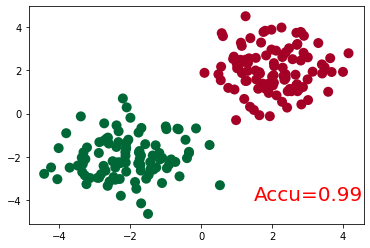

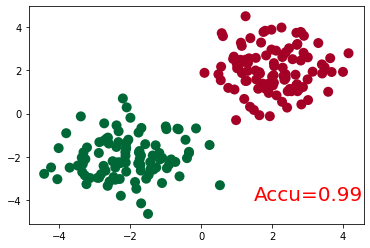

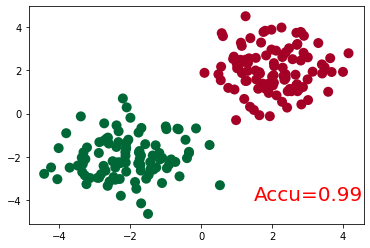

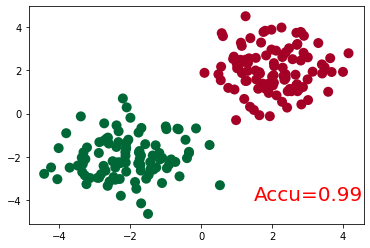

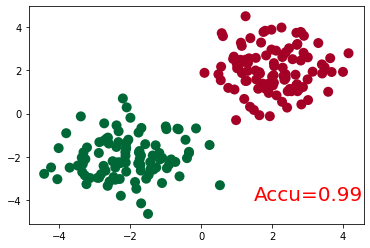

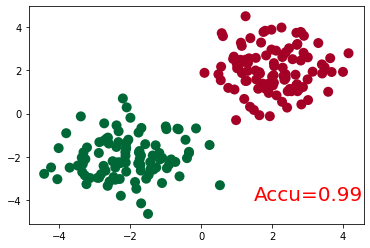

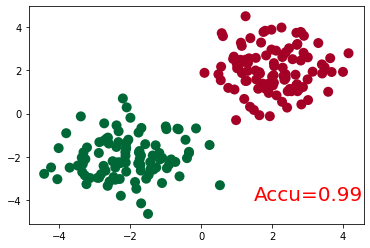

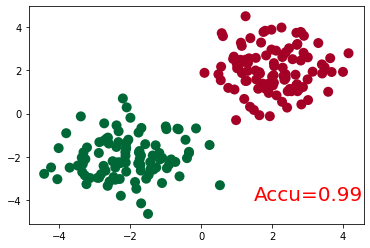

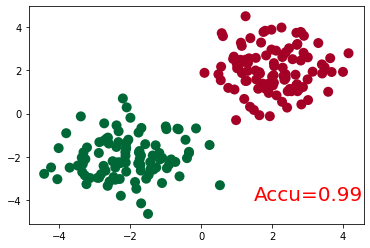

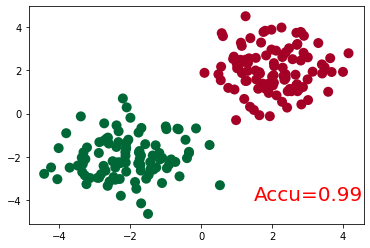

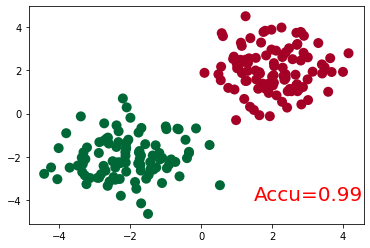

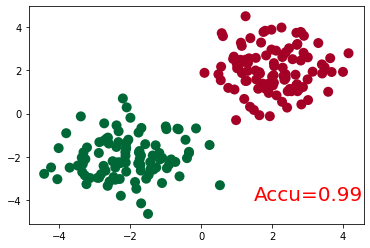

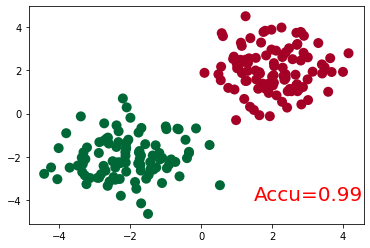

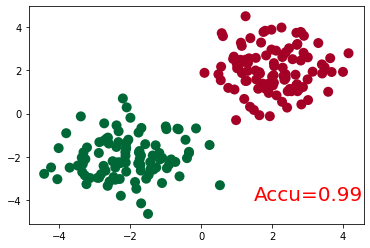

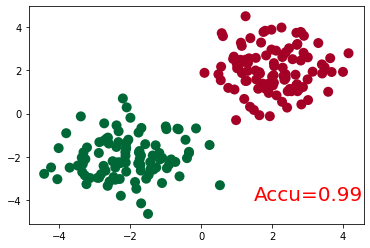

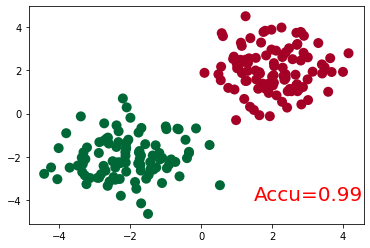

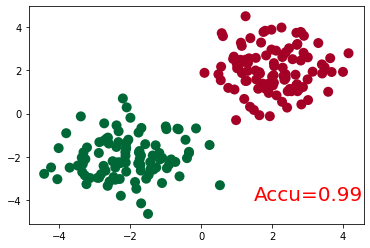

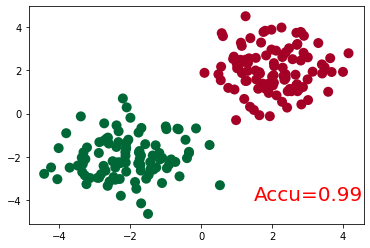

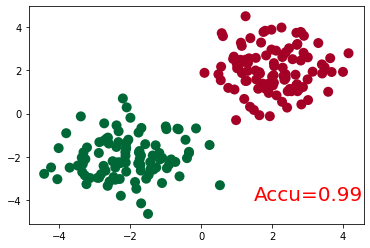

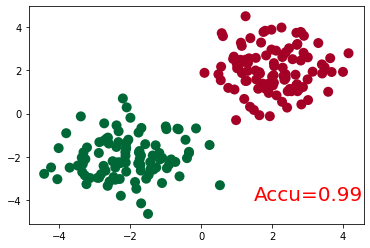

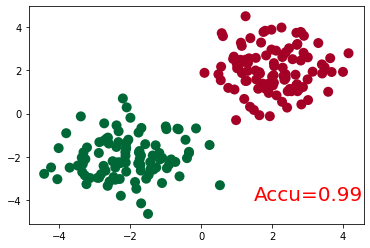

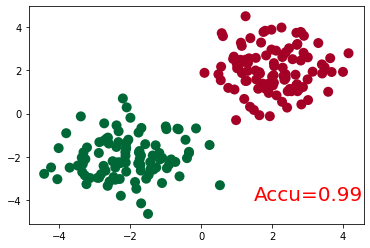

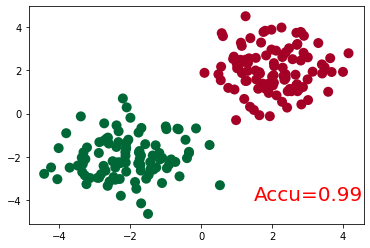

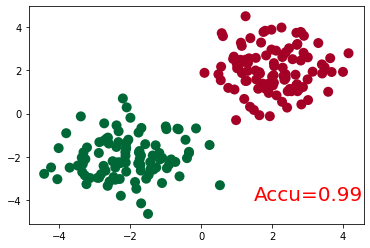

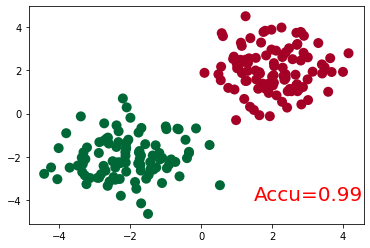

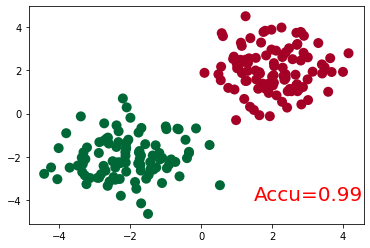

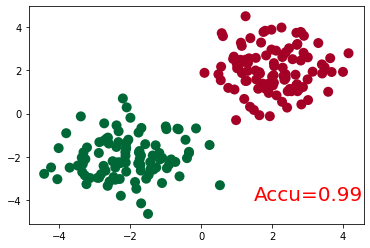

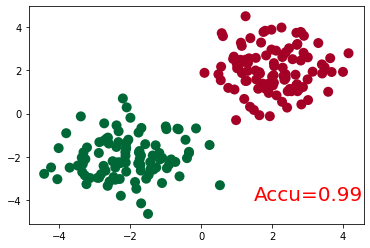

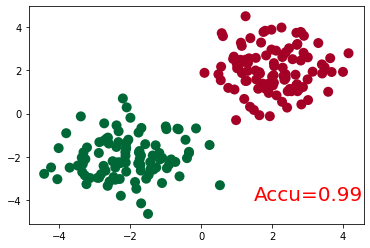

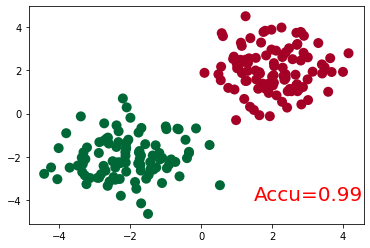

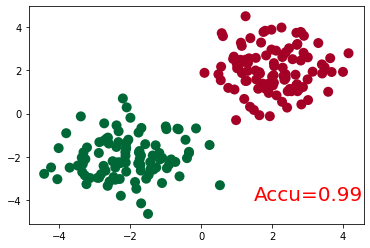

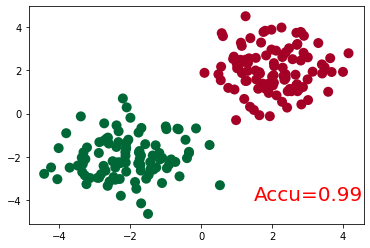

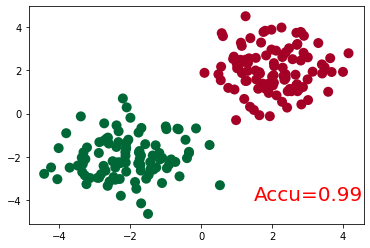

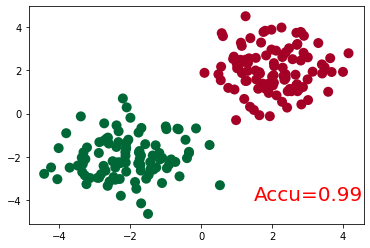

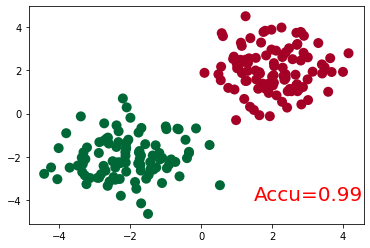

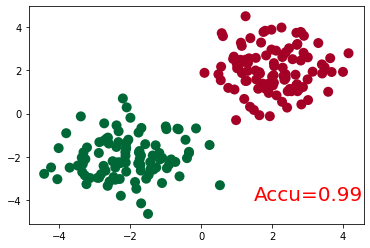

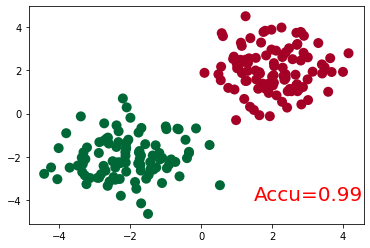

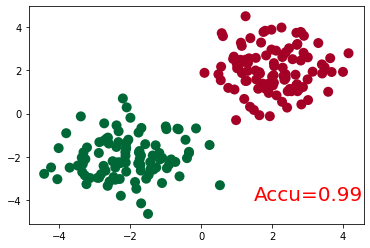

In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 生成数据
# 分别生成2组各100个数据点，增加正态噪声，后标记以y0=0 y1=1两类标签，最后cat连接到一起
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1) # 以tensor的形式给出输出tensor各元素的均值，共享标准差
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor) # 组装（连接）
y = torch.cat((y0, y1), 0).type(torch.LongTensor)
# 置入Variable中
x, y = Variable(x), Variable(y)

class Net(torch.nn.Module):

    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.012)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(100):
    out = net(x)
    loss = loss_func(out, y) # loss是定义为神经网络的输出与样本标签y的差别，故取softmax前的值
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        # torch.max既返回某个维度上的最大值，同时返回该最大值的索引值
        prediction = torch.max(F.softmax(out), 1)[1] # 在第1维度取最大值并返回索引值
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200 # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accu=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()